In [1]:
#Importing the requird modules:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers


# Loading the Fashion MNIST Dataset

In [2]:
# Load the dataset
data = fashion_mnist.load_data()

# Data Exloration:

In [3]:
# Data overview:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
# Spliting the data to test and train sets:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
# Display the shape of the dataset:

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
# checking the max value of X_train, X_test set:

print(f'X_train max: {np.max(X_train)}')
print(f'X_test max: {np.max(X_test)}')

X_train max: 255
X_test max: 255


In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
y = np.unique(y_train)

In [9]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
# Fashion classes in data original dataset:

fashion_classes = ['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

In [11]:
# Create a dictionary to map y_train values to fashion classes
mapping = {i: fashion_classes[i] for i in y_train}

# Apply the mapping to y_train
fashion_labels = [mapping[val] for val in y_train]

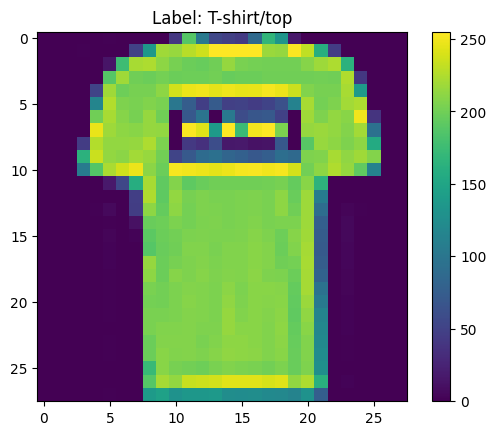

In [12]:
# Display any image and its label before normalization:

plt.figure()
plt.imshow(X_train[1])
plt.title(f'Label: {fashion_labels[1]}')
plt.colorbar()
plt.show()

# Normalization:

In [13]:
# Deep learning model works best with values between 0 and 1; Rescaling max value to 1.

norm_X_train = X_train/255
norm_X_test = X_test/255

# rechecking the max value of X_train, X_test set after normalizing:

print(f'Normalized X_train max: {np.max(norm_X_train)}')
print(f'Normalized X_test max: {np.max(norm_X_test)}')


Normalized X_train max: 1.0
Normalized X_test max: 1.0


In [14]:
# Reshape the data to add a channel dimension
norm_X_train = norm_X_train.reshape((norm_X_train.shape[0], 28, 28, 1))
norm_X_test = norm_X_test.reshape((norm_X_test.shape[0], 28, 28, 1))

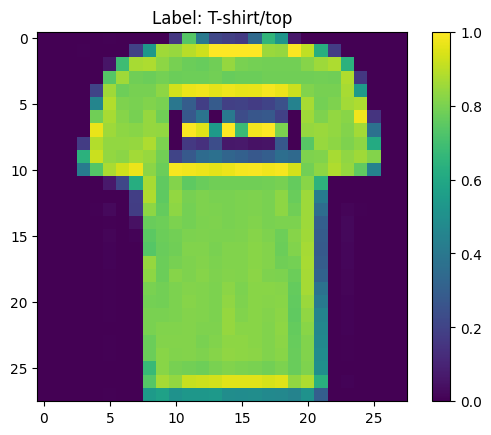

In [15]:
# Display any image and its label after normalization:
plt.figure()
plt.imshow(norm_X_train[1])
plt.title(f'Label: {fashion_labels[1]}')
plt.colorbar()
plt.show()

# Building the CNN model:

In [16]:
# Building the CNN model:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\e_chi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model:

In [17]:
# Compiling the model:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model:

In [18]:
# Training the model:

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7520 - loss: 0.9704 - val_accuracy: 0.8569 - val_loss: 0.3980
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8719 - loss: 0.3466 - val_accuracy: 0.8528 - val_loss: 0.3898
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8893 - loss: 0.3047 - val_accuracy: 0.8678 - val_loss: 0.3660
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8926 - loss: 0.2876 - val_accuracy: 0.8812 - val_loss: 0.3221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9012 - loss: 0.2630 - val_accuracy: 0.8859 - val_loss: 0.3158
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9074 - loss: 0.2503 - val_accuracy: 0.8867 - val_loss: 0.3313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9143 - loss: 0.2325 - val_accuracy: 0.8822 - val_loss: 0.3251
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9175 - los

# Predictions:

In [19]:
# Predictions:

predictions = model.predict(norm_X_test[:2])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
[[1.63521487e-04 7.96070708e-06 2.12905124e-05 7.01738099e-05
  1.30325125e-05 5.49276769e-01 5.46375013e-05 3.72454792e-01
  6.09471370e-03 7.18430430e-02]
 [6.19391464e-02 2.30239313e-02 4.61330265e-02 8.51950273e-02
  2.11205650e-02 1.35183856e-01 5.40245697e-02 2.36569777e-01
  1.95995107e-01 1.40815079e-01]]
